In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv(r'C:\Users\Kshitij\Downloads\Heart Attack Analysis & Prediction\heart.csv')

In [19]:
df.head

<bound method NDFrame.head of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  outp

In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [23]:
 df.drop_duplicates(keep = 'first', inplace = True)

****Gender Categorization****

Number of people having sex as 1 are 206 and Number of people having sex as 0 are 96


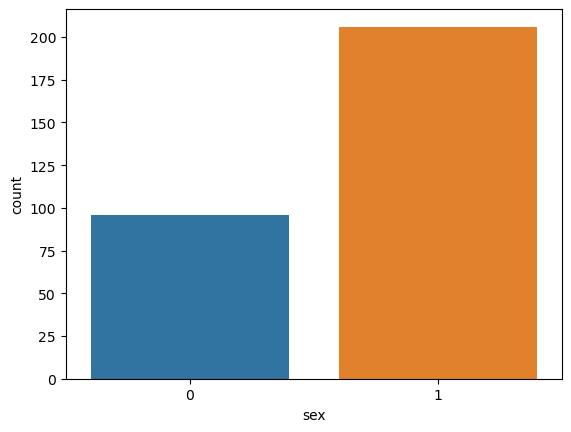

In [36]:
x = (df.sex.value_counts())
print(f'Number of people having sex as 1 are {x[1]} and Number of people having sex as 0 are {x[0]}')
p = sns.countplot(data = df, x = 'sex')
plt.show()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64


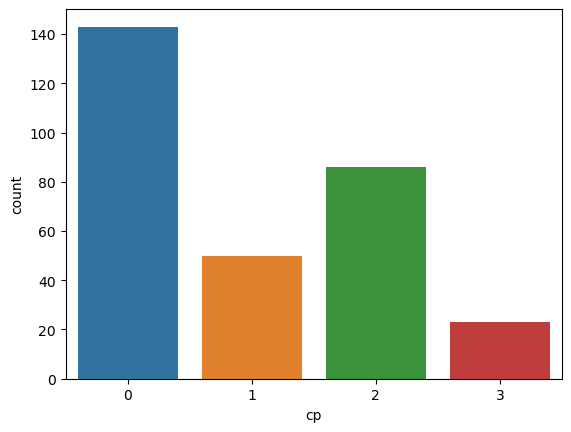

In [37]:
x = (df.cp.value_counts())
print(x)
p = sns.countplot(data = df, x = 'cp')
plt.show()

<Figure size 1000x1000 with 0 Axes>

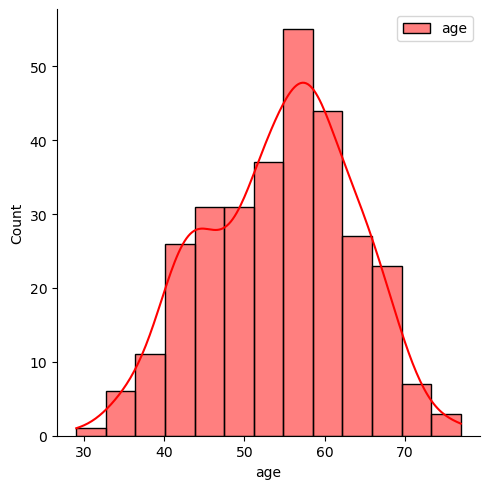

In [38]:
plt.figure(figsize = (10,10))
sns.displot(df.age, color = 'red', label = "age", kde = True)
plt.legend()

<Figure size 1000x1000 with 0 Axes>

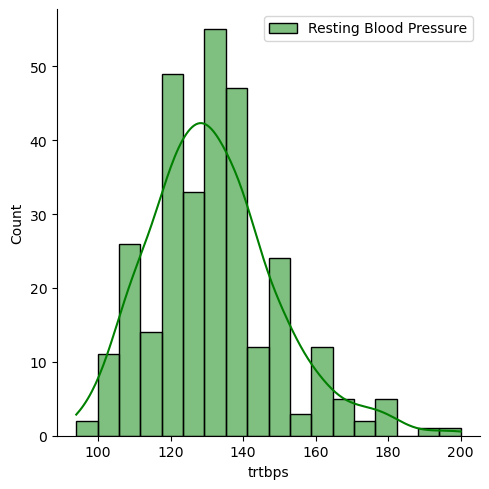

In [39]:
plt.figure(figsize = (10,10))
sns.displot(df.trtbps, color = 'green', label = "Resting Blood Pressure", kde = True)
plt.legend()

<Figure size 1000x1000 with 0 Axes>

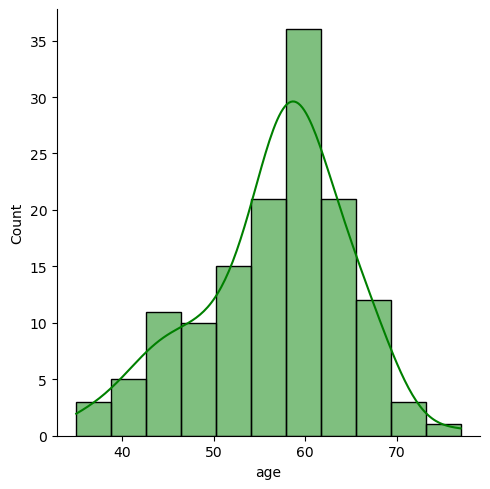

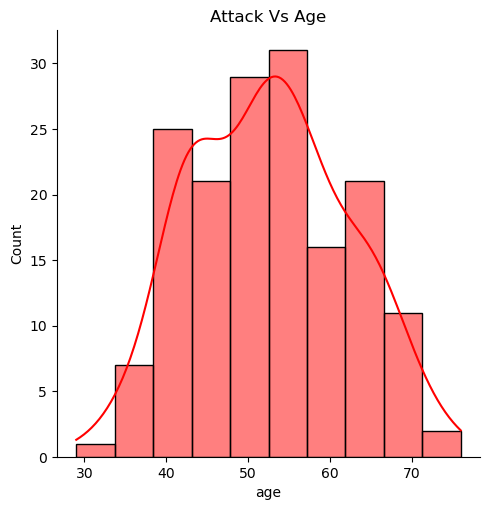

In [40]:
plt.figure(figsize = (10,10))
sns.displot(df[df['output']==0]['age'], color = 'green', kde = True)
sns.displot(df[df['output']==1]['age'], color = 'red', kde = True) 
plt.title("Attack Vs Age")
plt.show()

<Figure size 1000x1000 with 0 Axes>

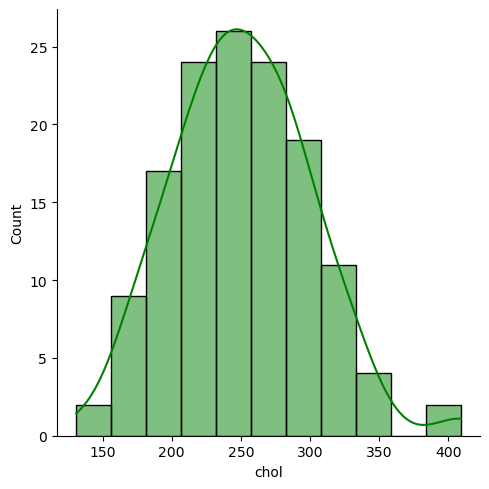

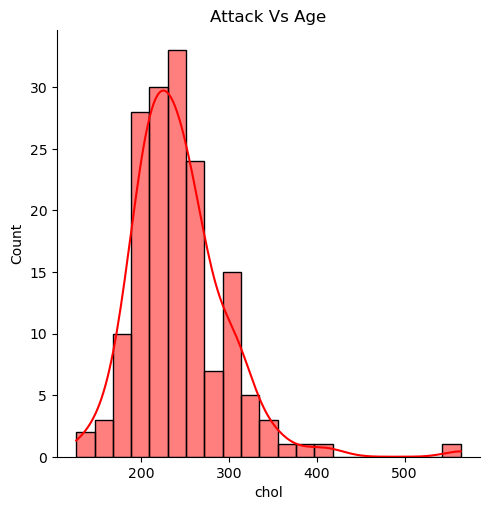

In [41]:
plt.figure(figsize = (10,10))
sns.displot(df[df['output']==0]['chol'], color = 'green', kde = True)
sns.displot(df[df['output']==1]['chol'], color = 'red', kde = True) 
plt.title("Attack Vs Age")
plt.show()

In [42]:
y = df.iloc[:, -1].values
X = df.iloc[:, 1:-1].values

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40, test_size = 0.19)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [52]:
y_pred = gnb.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix :\n",confusion_matrix(y_pred, y_test))

Confusion Matrix :
 [[22  3]
 [ 2 31]]


In [59]:
from sklearn.metrics import accuracy_score
print("Accuracy Score :\n",round(accuracy_score(y_pred, y_test)*100,2), "%")

Accuracy Score :
 91.38 %
